# Question 4
Predict the Top Complaint Type

# Imports + Options

In [1]:
# Normal data analysis packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML packages 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [2]:
pd.options.display.max_rows = 200
pd.options.display.max_columns = 40

sns.set_style('whitegrid')

# Data

## Data Imports

In [3]:
df311_final = pd.read_pickle('df311_final.pkl')
df311_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83487 entries, 0 to 89852
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeatingComplaint  83487 non-null  float64
 1   LotArea           83487 non-null  int64  
 2   BldgArea          83487 non-null  int64  
 3   ComArea           83487 non-null  int64  
 4   ResArea           83487 non-null  int64  
 5   OfficeArea        83487 non-null  int64  
 6   RetailArea        83487 non-null  int64  
 7   GarageArea        83487 non-null  int64  
 8   StrgeArea         83487 non-null  int64  
 9   FactryArea        83487 non-null  int64  
 10  OtherArea         83487 non-null  int64  
 11  NumBldgs          83487 non-null  int64  
 12  NumFloors         83487 non-null  float64
 13  UnitsTotal        83487 non-null  int64  
 14  AssessLand        83487 non-null  int64  
 15  AssessTot         83487 non-null  int64  
 16  YearBuilt         83487 non-null  int64 

# Predictions

## Train/ Test Split

In [4]:
X = df311_final.drop('HeatingComplaint',axis=1)
y = df311_final['HeatingComplaint']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Logistic Regression Model

In [5]:
complaint_logmodel = LogisticRegression(max_iter=500)
complaint_logmodel.fit(X_train,y_train)

predictions = complaint_logmodel.predict(X_test)

In [6]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.82      0.99      0.90     19866
         1.0       0.85      0.14      0.24      5181

    accuracy                           0.82     25047
   macro avg       0.83      0.57      0.57     25047
weighted avg       0.82      0.82      0.76     25047

[[19732   134]
 [ 4447   734]]


# Prediction Using Tensorflow

In [7]:
X = df311_final.drop('HeatingComplaint',axis=1).values
y = df311_final['HeatingComplaint'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [8]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
model = Sequential()

# input layer
model.add(Dense(31,activation='relu'))
model.add(Dropout(0.2))

# hidden layer 1
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))

#Binary classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [10]:
model.fit(x=X_train,y=y_train,epochs=25,validation_data=(X_test,y_test))

Train on 58440 samples, validate on 25047 samples
Epoch 1/25
58440/58440 [==============================] - 9s 159us/sample - loss: 0.4809 - val_loss: 0.4338
Epoch 2/25
58440/58440 [==============================] - 7s 124us/sample - loss: 0.4271 - val_loss: 0.4070
Epoch 3/25
58440/58440 [==============================] - 8s 129us/sample - loss: 0.4135 - val_loss: 0.4029
Epoch 4/25
58440/58440 [==============================] - 7s 123us/sample - loss: 0.4098 - val_loss: 0.3996
Epoch 5/25
58440/58440 [==============================] - 7s 124us/sample - loss: 0.4058 - val_loss: 0.3967
Epoch 6/25
58440/58440 [==============================] - 8s 131us/sample - loss: 0.4051 - val_loss: 0.3965
Epoch 7/25
58440/58440 [==============================] - 8s 129us/sample - loss: 0.4036 - val_loss: 0.3962
Epoch 8/25
58440/58440 [==============================] - 7s 123us/sample - loss: 0.4017 - val_loss: 0.3950
Epoch 9/25
58440/58440 [==============================] - 9s 154us/sample - loss: 0.40

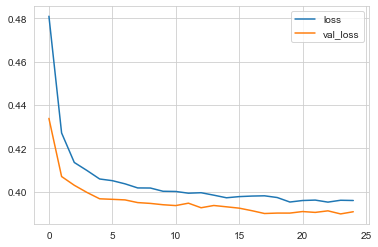

In [11]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [12]:
predictions = model.predict_classes(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     19866
         1.0       0.79      0.37      0.51      5181

    accuracy                           0.85     25047
   macro avg       0.82      0.67      0.71     25047
weighted avg       0.84      0.85      0.83     25047

[[19360   506]
 [ 3257  1924]]


In [13]:
y_test

array([0., 0., 0., ..., 0., 1., 1.])

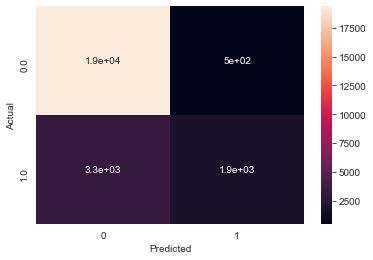

In [24]:
predictions_flat = [item for sublist in predictions for item in sublist]
data = {'y_Actual': y_test, 'y_Predicted':predictions_flat}

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

# Conclusions

0.76 and 0.83 weighted F1 scores for Logistic Regression and NN models respectively. Scores are affected by overfitting caused by inbalanced dataset. Both models under-predict 